Model: ARIMA
ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

p (past values used for forecasting the next value)
q (past forecast errors used to predict the future values)
d (order of differencing)
Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import math
from sklearn.metrics import mean_squared_error

plt.style.use('fivethirtyeight')

In [3]:
# Read in data.
stocks = pd.read_csv('../combined_twitter_index.csv', sep='\t')

In [4]:
stocks=stocks.drop(['Unnamed: 0', 'vader sentiment'], axis=1)

In [5]:
# Change date column to be datetime dtype
stocks["Date"] = pd.to_datetime(stocks["Date"])
stocks.dtypes

Date                   datetime64[ns]
High                          float64
Low                           float64
Open                          float64
Close                         float64
Volume                          int64
Adj Close                     float64
Return                        float64
Intraday Return               float64
Volume Return                 float64
Open-Close Movement           float64
High-Low Ratio                float64
vader compound                float64
Twitter Index                 float64
Close_TTI                     float64
Volume_TTI                    float64
dtype: object

In [8]:
stocks.set_index('Date', inplace=True)
stocks.sort_index(inplace=True)
stocks.tail()

,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,vader compound,Twitter Index,Close_TTI,Volume_TTI
Date,,,,,,,,,,,,,,,
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,2274.639893,0.001850,0.000836,-0.110007,0.101304,0.315646,-1.9821,-0.165694,2272.732700,-6.107385e+09
2017-01-17,2272.080078,2262.810059,2269.139893,2267.889893,3584990000,2267.889893,-0.002968,-0.000551,0.163478,-0.241797,0.409668,2.4403,-0.134429,2269.133968,8.748451e+09
2017-01-18,2272.010010,2263.350098,2269.139893,2271.889893,3315250000,2271.889893,0.001764,0.001212,-0.075241,0.055117,0.382615,0.4703,0.056996,2269.142404,1.559162e+09
2017-01-19,2274.330078,2258.409912,2271.899902,2263.689941,3165970000,2263.689941,-0.003609,-0.003614,-0.045028,0.000441,0.704928,1.2141,-0.438739,2271.880591,3.843804e+09
2017-01-20,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,-1.9670,-0.116991,2269.954807,-6.933616e+09


In [9]:
# Convert the date to a weekly format
stocks = stocks.resample('W').mean()
stocks

,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,vader compound,Twitter Index,Close_TTI,Volume_TTI
Date,,,,,,,,,,,,,,,
2009-01-25,842.427490,806.532486,829.577499,826.227493,6.129762e+09,826.227493,0.011236,-0.003366,-0.027983,-0.128082,4.452751,-0.773175,-6.595984,828.782298,-4.545433e+09
2009-02-01,860.278003,834.928003,846.021997,845.478015,5.602004e+09,845.478015,-0.001175,-0.000458,-0.009343,-0.074820,3.036477,1.480920,-4.400175,845.503755,7.832283e+09
2009-02-08,849.305994,825.871985,832.878015,842.125989,6.217632e+09,842.125989,0.010215,0.011065,0.039837,-0.085015,2.835811,0.303580,0.161267,832.897320,1.903373e+09
2009-02-15,851.237988,828.042004,845.275989,838.564001,6.008822e+09,838.564001,-0.009588,-0.007684,-0.027954,-0.193248,2.815641,3.938940,1.820017,845.492040,2.266879e+10
2009-02-22,797.762497,775.220001,793.362488,781.644989,6.401515e+09,781.644989,-0.017487,-0.014547,0.129219,-0.303670,2.908082,0.902775,1.081614,793.491010,6.704837e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-25,2267.645996,2260.883984,2263.891992,2264.643994,2.859250e+09,2264.643994,0.000509,0.000334,-0.172049,0.017372,0.299124,1.410160,0.232172,2263.902250,4.482535e+09
2017-01-01,2263.305054,2248.360046,2259.392517,2251.722473,2.346678e+09,2251.722473,-0.002760,-0.003390,0.076793,0.063276,0.665607,1.163225,-0.737914,2259.359947,2.850659e+09
2017-01-08,2272.575012,2257.809998,2263.122498,2268.640015,3.659282e+09,2268.640015,0.004239,0.002440,0.074309,0.179288,0.654223,-0.905450,-0.324402,2263.108177,-3.276722e+09


In [10]:
print(stocks.shape)


(418, 15)


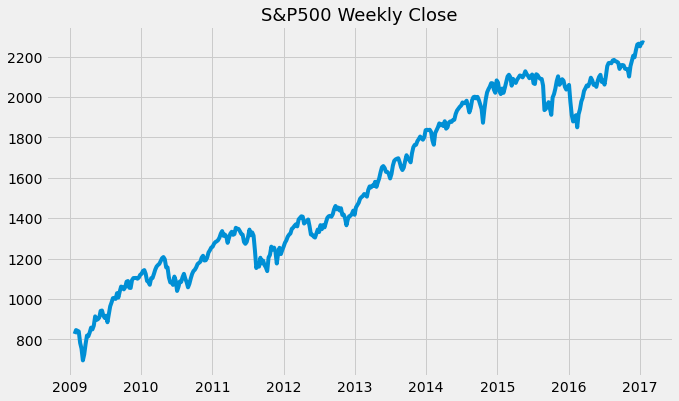

In [11]:
# Plot data.
plt.figure(figsize=(10,6))
plt.plot(stocks['Close'])
plt.title(label = 'S&P500 Weekly Close', fontsize=18)
plt.show();

In [12]:
# This is for eXogenous
stocks['Close_TTI_lag_1'] = stocks['Close_TTI'].shift(1)
stocks.head()

,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,vader compound,Twitter Index,Close_TTI,Volume_TTI,Close_TTI_lag_1
Date,,,,,,,,,,,,,,,,
2009-01-25,842.427490,806.532486,829.577499,826.227493,6.129762e+09,826.227493,0.011236,-0.003366,-0.027983,-0.128082,4.452751,-0.773175,-6.595984,828.782298,-4.545433e+09,NaN
2009-02-01,860.278003,834.928003,846.021997,845.478015,5.602004e+09,845.478015,-0.001175,-0.000458,-0.009343,-0.074820,3.036477,1.480920,-4.400175,845.503755,7.832283e+09,828.782298
2009-02-08,849.305994,825.871985,832.878015,842.125989,6.217632e+09,842.125989,0.010215,0.011065,0.039837,-0.085015,2.835811,0.303580,0.161267,832.897320,1.903373e+09,845.503755
2009-02-15,851.237988,828.042004,845.275989,838.564001,6.008822e+09,838.564001,-0.009588,-0.007684,-0.027954,-0.193248,2.815641,3.938940,1.820017,845.492040,2.266879e+10,832.897320
2009-02-22,797.762497,775.220001,793.362488,781.644989,6.401515e+09,781.644989,-0.017487,-0.014547,0.129219,-0.303670,2.908082,0.902775,1.081614,793.491010,6.704837e+09,845.492040


Train/Test Split
The goal, as with all train/test splits, is to:

avoid overfitting in our model, and
to get an unbiased estimate of model performance on new, "unseen" data.
When fitting a time series model, it will not be a random train-test split like with non-correlated data.

Since the goal with time series analysis is almost always to forecast values forward in time, the idea with a time series train/test split is to train on earlier data and test/evaluate on later data.

Most commonly, the following will be set:

training set to be the "first" 67% - 80% of the data timewise.
test set be the "last" 20% - 33% timewise.
Split the dataframe by taking the first 80% of rows for training and the rest for testing.

In [13]:
round(stocks.shape[0]*(4/5))

334

In [14]:
train = stocks.iloc[0:334]

In [15]:
test =stocks.iloc[334:]

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
# Instantiate an AR(1) model on training data.
# Note this training data consists of the 
# time periods 0 through 125.
ar1 = ARIMA(endog=train['Close'], order = (1,0,0))

# Fit AR(1) model.
model = ar1.fit()

# Generate predictions based on test set.
# Start at time period 126 and end at 156.
preds = model.predict(start= 334, end= 417)

# Evaluate predictions.
Score = mean_squared_error(test['Close'], preds)
print('Score: %.8f MSE (%.8f RMSE)' % (Score, math.sqrt(Score)))

Score: 11176.31241524 MSE (105.71807989 RMSE)


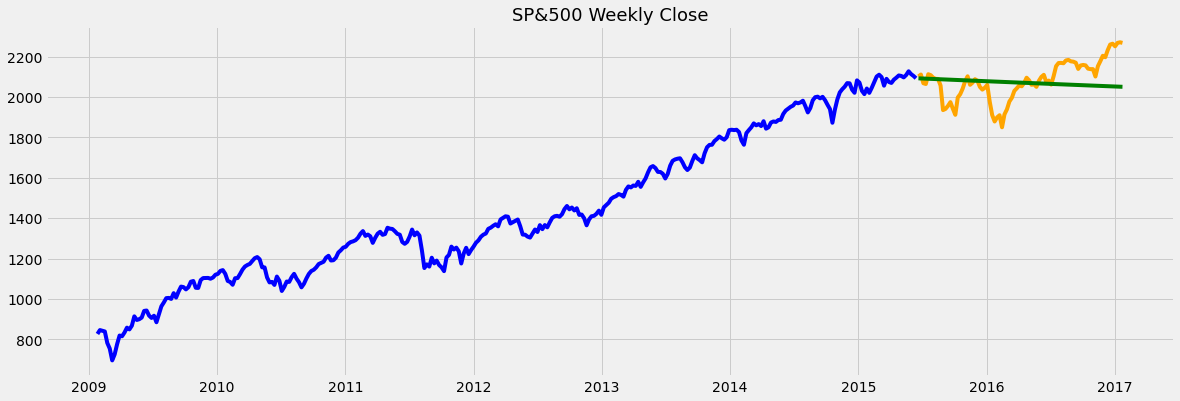

In [26]:
# Plot data.
plt.figure(figsize=(18,6))

# Plot training data in blue.
plt.plot(train['Close'], color = 'blue')

# Plot testing data in orange.
plt.plot(test['Close'], color = 'orange')

# Plot predicted values in green.
plt.plot(preds, color = 'green')

plt.title(label = 'SP&500 Weekly Close', fontsize=18)
plt.show();

As seen above, the model is not a particularly good, with an RMSE of 105.9 (compared to baseline RMSE of 108.84) Therefore, to explore improvements of model by fitting an ARIMA model as per below.

# ARIMA
An AR (autoregressive) model is used when the goal is to measure/predict long-term trends.
An MA (moving average) model is used when the goal is to anticipate the time series will have substantial, sudden shocks in the data.
The assumption that the data is stationarity must be met in order for to fit an ARIMA model. This can be verified visually by examining the original data plot (for a constant mean) and autocorrelation plot (for autocorrelation) or execute the augmented Dickey-Fuller test.


In [27]:
#Import Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic', 'p-value'] )
    return dfoutput

interpret_dftest(adfuller(train['Volume']))

Test Statistic   -3.283783
p-value           0.015619
dtype: float64

As the 𝑝-value of 0.015619 is less than the reasonable choices for 𝛼 of 0.05, therefore there is enough evidence to reject the null hypothesis and accept that the time series is stationary.

Choosing the right values of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>p</mi>
</math> , <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>d</mi>
</math> , and <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>q</mi>
</math>.

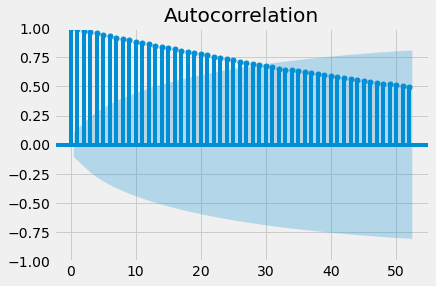

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate autocorrelation plot on training data.
plot_acf(train['Close'], lags = 52);
# Note: we would generate the ACF plot on 
# differenced data, if we needed to difference
# in order to achieve stationarity!

/Users/arsenyerbol/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


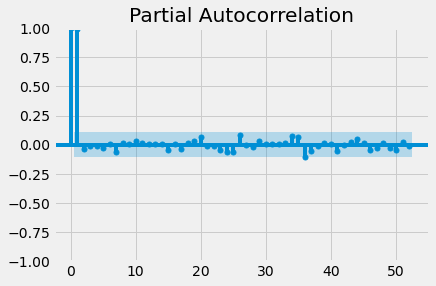

In [30]:
# Generate partial autocorrelation plot on training data.
plot_pacf(train['Close'], lags = 52);

# Note: we would generate the PACF plot on 
# differenced data, if we needed to difference
# in order to achieve stationarity!

In [32]:
# Instantiate an AR(1) model on training data.
# Note this training data consists of the 
# time periods 0 through 125.
ar1 = ARIMA(endog = train['Close'],
            order = (1, 0, 0)) # (p, d, q)

# Fit AR(1) model.
model = ar1.fit()

# Generate predictions based on test set.
# Start at time period 126 and end at 156.
preds = model.predict(start= 334, end=417)

# Evaluate predictions.
Score = mean_squared_error(test['Close'], preds)
print('Score: %.8f MSE (%.8f RMSE)' % (Score, math.sqrt(Score)))


Score: 11176.31241524 MSE (105.71807989 RMSE)


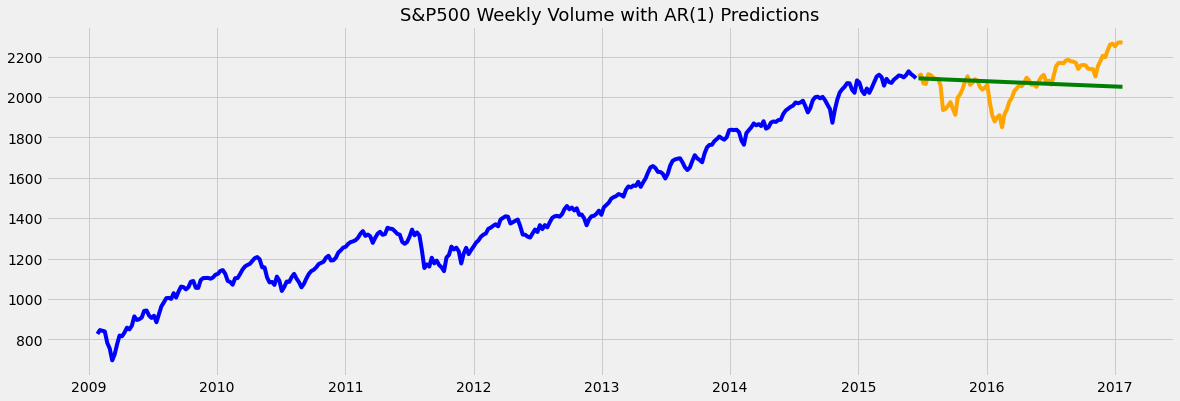

In [33]:
# Plot data.
plt.figure(figsize=(18,6))
plt.plot(train['Close'], color = 'blue')
plt.plot(test['Close'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'S&P500 Weekly Volume with AR(1) Predictions', fontsize=18)
plt.show();

In [35]:
# Instantiate an AR(2) model on training data.
# Note this training data consists of the 
# time periods 0 through 125.
ar2 = ARIMA(endog = train['Close'],
            order = (2,0,0) ) # (p, d, q)

# Fit AR(2) model.
model = ar2.fit()

# Generate predictions based on test set.
# Start at time period 126 and end at 156.
preds = model.predict(start= 334, end=417)

# Evaluate predictions.
Score = mean_squared_error(test['Close'], preds)
print('Score: %.8f MSE (%.8f RMSE)' % (Score, math.sqrt(Score)))

Score: 12172.98882377 MSE (110.33126857 RMSE)


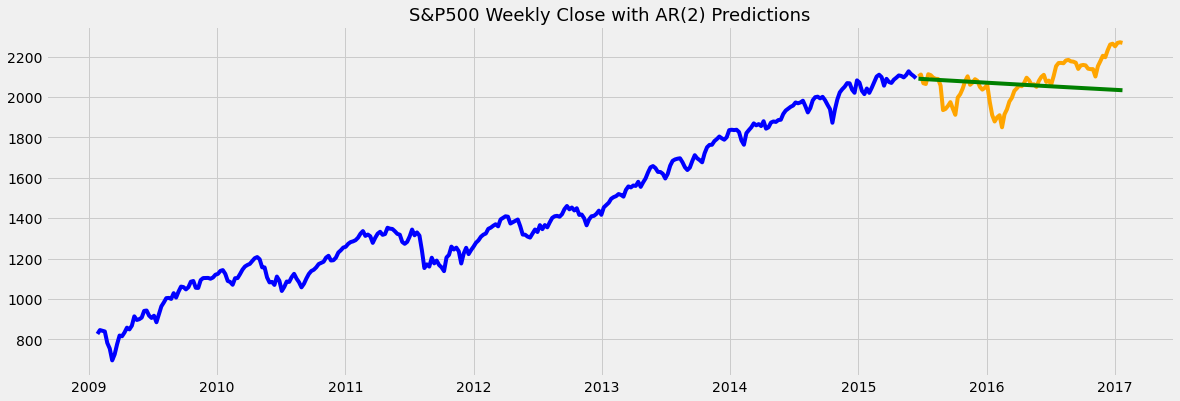

In [36]:
# Plot data.
plt.figure(figsize=(18,6))
plt.plot(train['Close'], color = 'blue')
plt.plot(test['Close'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'S&P500 Weekly Close with AR(2) Predictions', fontsize=18)
plt.show();

None of the above appear to be particularly good, either, with an RMSE of 245.91 and 265.19 (compared to baseline RMSE of 108.84) respectively.

As seen earlier, an auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model captured an increasing trend in the series. Although the predictions using this technique are far better than that of the previously implemented machine learning models, these predictions are still not close to the real values.

As its evident from the plot, the model has captured a trend in the series, but does not focus on the seasonal part. In the next section, I will implement a time series model that takes both trend and seasonality of a series into account.

# eXogenous Predictors
In time series analysis, most time is focused on how to quantify the relationship between  and  and then use that relationship to forecast values of .

Future performance of S&P500 Index is highly not limited to purely on past performance of S&P500 Index. The performance of S&P500 will be based on many several factors i.e. performance of its competitors, interest rates, politics etc.

However,  variables can still be used in the data - in statsmodels and in various disciplines like econometrics, the  variables are known as exogenous. The SARIMAX model stands for "Seasonal Autoregressive Integrated Moving Average with eXogenous regressors model."

One important practical note:
To fit a SARIMAX model, it is important to enure that the  variable makes sense - especially timewise.

For example, in order to predict S&P500 stock volume for January 2020 based on Trump Twitter Index's close price, it will not be wise to use Trump Twitter Index's close price in January 2020 as an input. (as it is not relevant to forecast a value of  when there is no available information/access to that value of .) Therefore,  variable should be lag by at least one time point as above:

stocks['Close_TTI_lag_1'] = stocks['Close_TTI'].shift(1)

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.64705D+00    |proj g|=  1.81078D-01


 This problem is unconstrained.



At iterate    5    f=  4.64691D+00    |proj g|=  5.17216D-01

At iterate   10    f=  4.64475D+00    |proj g|=  3.58398D-01

At iterate   15    f=  4.64465D+00    |proj g|=  4.63077D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   7.579D-03   4.645D+00
  F =   4.6446488182468810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Score: 1273.31989416 MSE (35.68360820 RMSE)


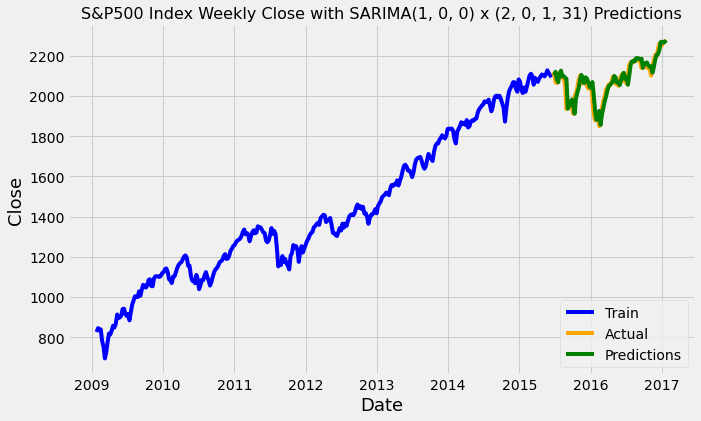

In [44]:
# Fit and visualize a SARIMAX(1, 0, 0) x (2, 0, 1, 31) model.

sarima = SARIMAX(endog = train['Close'].iloc[1:],
                 order = (1, 0, 0),              # (p, d, q)
                 seasonal_order = (2,0,1,31), # (P, D, Q, S)
                 exog = train['Close_TTI_lag_1'].iloc[1:])

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
# Start at time period 126 and end at 155.
preds = model.predict(start= 334, end=416, exog=test[['Close_TTI_lag_1']])

# Evaluate predictions.
mse = mean_squared_error(test['Close'].iloc[1:], preds)
print('Score: %.8f MSE (%.8f RMSE)' % (mse, math.sqrt(mse)))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train['Close'], color = 'blue')
plt.plot(test['Close'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'S&P500 Index Weekly Close with SARIMA(1, 0, 0) x (2, 0, 1, 31) Predictions', fontsize=16)
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.show();


SARIMAX (like most time series forecasting techniques) tries to capture the trend and seasonality from past data. This model usually performs well on time series datasets abd appears to live up to its reputation in this case - with a RMSE of 36.61 (significant improvement from baseline RMSE of 108.84).

It is known that stock prices do not have a particular trend or seasonality as it is highly depends on what is currently going on in the market and thus the prices rise and fall. Hence forecasting techniques like ARIMA and SARIMA may not show the best results for this particular problem.

Next, I will go ahead and try another advanced technique – Long Short Term Memory (LSTM) in notebook "3.3_Model_LSTM"